In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
# Create Model Class for Neural Network inheriting nn Module
class Model(nn.Module):
  #Input 4 features of the flower >>
  #Hidden Layer H1 >>
  #Hidden Layer H2 >>
  #Output Layer (3)
    def __init__(self, input_features=4, h1=8, h2=9, output = 3):
        super().__init__() ## Instantiate nn.Module
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output)

    def forward(self, input):
        x = F.relu(self.fc1(input))
        x = F.relu(self.fc2(x))
        output = self.out(x)

        return output




In [44]:
#Randomization
torch.manual_seed(41)
#Create an instance of model
model = Model()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
iris_data = pd.read_csv('iris.csv')

In [24]:
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
iris_data['Species']=iris_data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
#Train Test split
X = iris_data.drop('Species', axis=1)
Y = iris_data['Species']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [39]:
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
Y_train=torch.LongTensor(Y_train.values)
Y_test=torch.LongTensor(Y_test.values)

In [45]:
# Set criterion to measure the error woth loss function
loss_func = nn.CrossEntropyLoss()
#Choose Optimizer - Learning rate
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [46]:
#train the model
#Epoch (one run through all training data in ournetwork)
epochs=100
losses=[]
for i in range(epochs):

  #Go Forwards
  Y_pred=model.forward(X_train)

  #Measure the loss and keep track
  loss= loss_func(Y_pred,Y_train)
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch: {i} and Loss: {loss}')

  #Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch: 0 and Loss: 1.125203251838684
Epoch: 10 and Loss: 1.0097211599349976
Epoch: 20 and Loss: 0.8162347674369812
Epoch: 30 and Loss: 0.585993230342865
Epoch: 40 and Loss: 0.4003389775753021
Epoch: 50 and Loss: 0.26794716715812683
Epoch: 60 and Loss: 0.1796349585056305
Epoch: 70 and Loss: 0.12165623158216476
Epoch: 80 and Loss: 0.0860651507973671
Epoch: 90 and Loss: 0.06522614508867264


In [35]:
losses

[array(0.05286872, dtype=float32),
 array(0.05193041, dtype=float32),
 array(0.05103434, dtype=float32),
 array(0.05017532, dtype=float32),
 array(0.04935453, dtype=float32),
 array(0.04856636, dtype=float32),
 array(0.04781177, dtype=float32),
 array(0.04708674, dtype=float32),
 array(0.04639099, dtype=float32),
 array(0.04572271, dtype=float32),
 array(0.04508011, dtype=float32),
 array(0.04446202, dtype=float32),
 array(0.04386631, dtype=float32),
 array(0.04329308, dtype=float32),
 array(0.04273949, dtype=float32),
 array(0.04220609, dtype=float32),
 array(0.04169021, dtype=float32),
 array(0.04119236, dtype=float32),
 array(0.04071035, dtype=float32),
 array(0.04024446, dtype=float32),
 array(0.03979311, dtype=float32),
 array(0.0393565, dtype=float32),
 array(0.0389335, dtype=float32),
 array(0.03852361, dtype=float32),
 array(0.03812569, dtype=float32),
 array(0.0377395, dtype=float32),
 array(0.03736429, dtype=float32),
 array(0.03699959, dtype=float32),
 array(0.03664503, dtyp

Text(0.5, 0, 'Epoch')

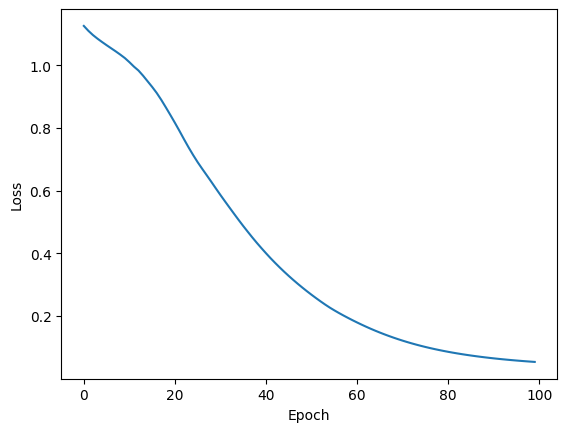

In [47]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')